# House Prices - Exploratory Data Analysis

Comprehensive EDA to understand the data and identify improvement opportunities


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

data_dir = 'house-prices-advanced-regression-techniques'
train = pd.read_csv(f'{data_dir}/train.csv')
test = pd.read_csv(f'{data_dir}/test.csv')

print(f"Train: {train.shape}, Test: {test.shape}")
print(f"\nTrain columns: {len(train.columns)}")
print(f"Missing values in train: {train.isnull().sum().sum()}")
print(f"Missing values in test: {test.isnull().sum().sum()}")


Train: (1460, 81), Test: (1459, 80)

Train columns: 81
Missing values in train: 7829
Missing values in test: 7878


In [2]:
train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

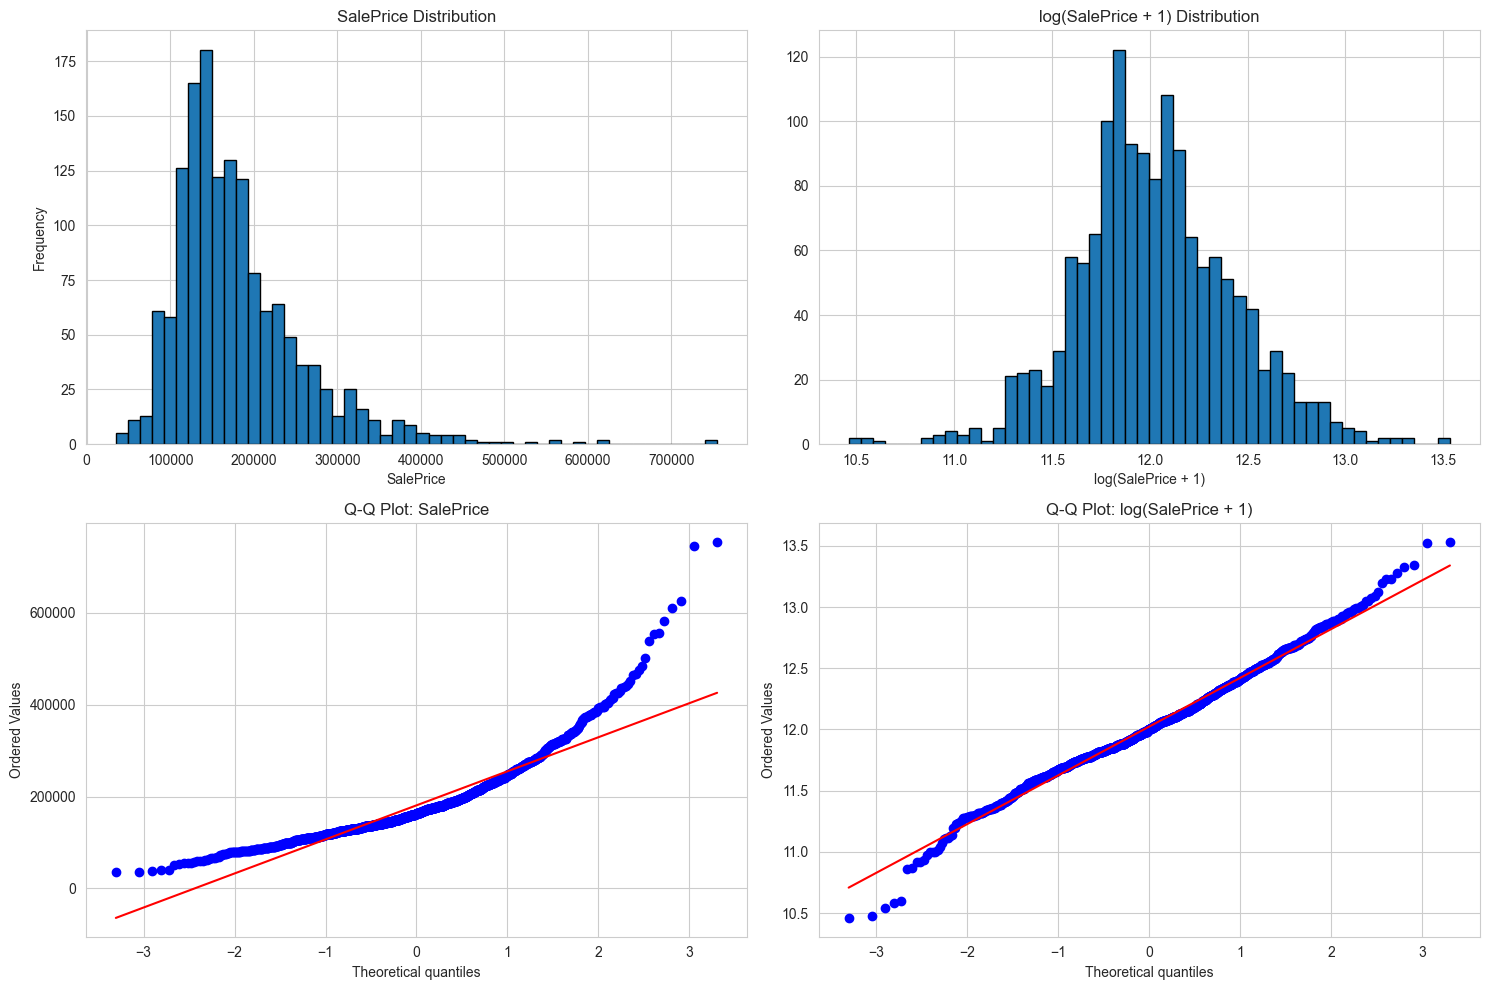

Skewness (SalePrice): 1.8829
Skewness (log): 0.1213
Kurtosis (SalePrice): 6.5363
Kurtosis (log): 0.8095


In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(train['SalePrice'], bins=50, edgecolor='black')
axes[0, 0].set_title('SalePrice Distribution')
axes[0, 0].set_xlabel('SalePrice')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(np.log1p(train['SalePrice']), bins=50, edgecolor='black')
axes[0, 1].set_title('log(SalePrice + 1) Distribution')
axes[0, 1].set_xlabel('log(SalePrice + 1)')

stats.probplot(train['SalePrice'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: SalePrice')

stats.probplot(np.log1p(train['SalePrice']), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: log(SalePrice + 1)')

plt.tight_layout()
plt.show()

print(f"Skewness (SalePrice): {train['SalePrice'].skew():.4f}")
print(f"Skewness (log): {np.log1p(train['SalePrice']).skew():.4f}")
print(f"Kurtosis (SalePrice): {train['SalePrice'].kurtosis():.4f}")
print(f"Kurtosis (log): {np.log1p(train['SalePrice']).kurtosis():.4f}")


In [4]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('Id')
numeric_cols.remove('SalePrice')

correlations = train[numeric_cols + ['SalePrice']].corr()['SalePrice'].sort_values(ascending=False)
print("Top 20 features correlated with SalePrice:")
print(correlations.head(20))
print("\nBottom 10 features correlated with SalePrice:")
print(correlations.tail(10))


Top 20 features correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64

Bottom 10 features correlated with SalePrice:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


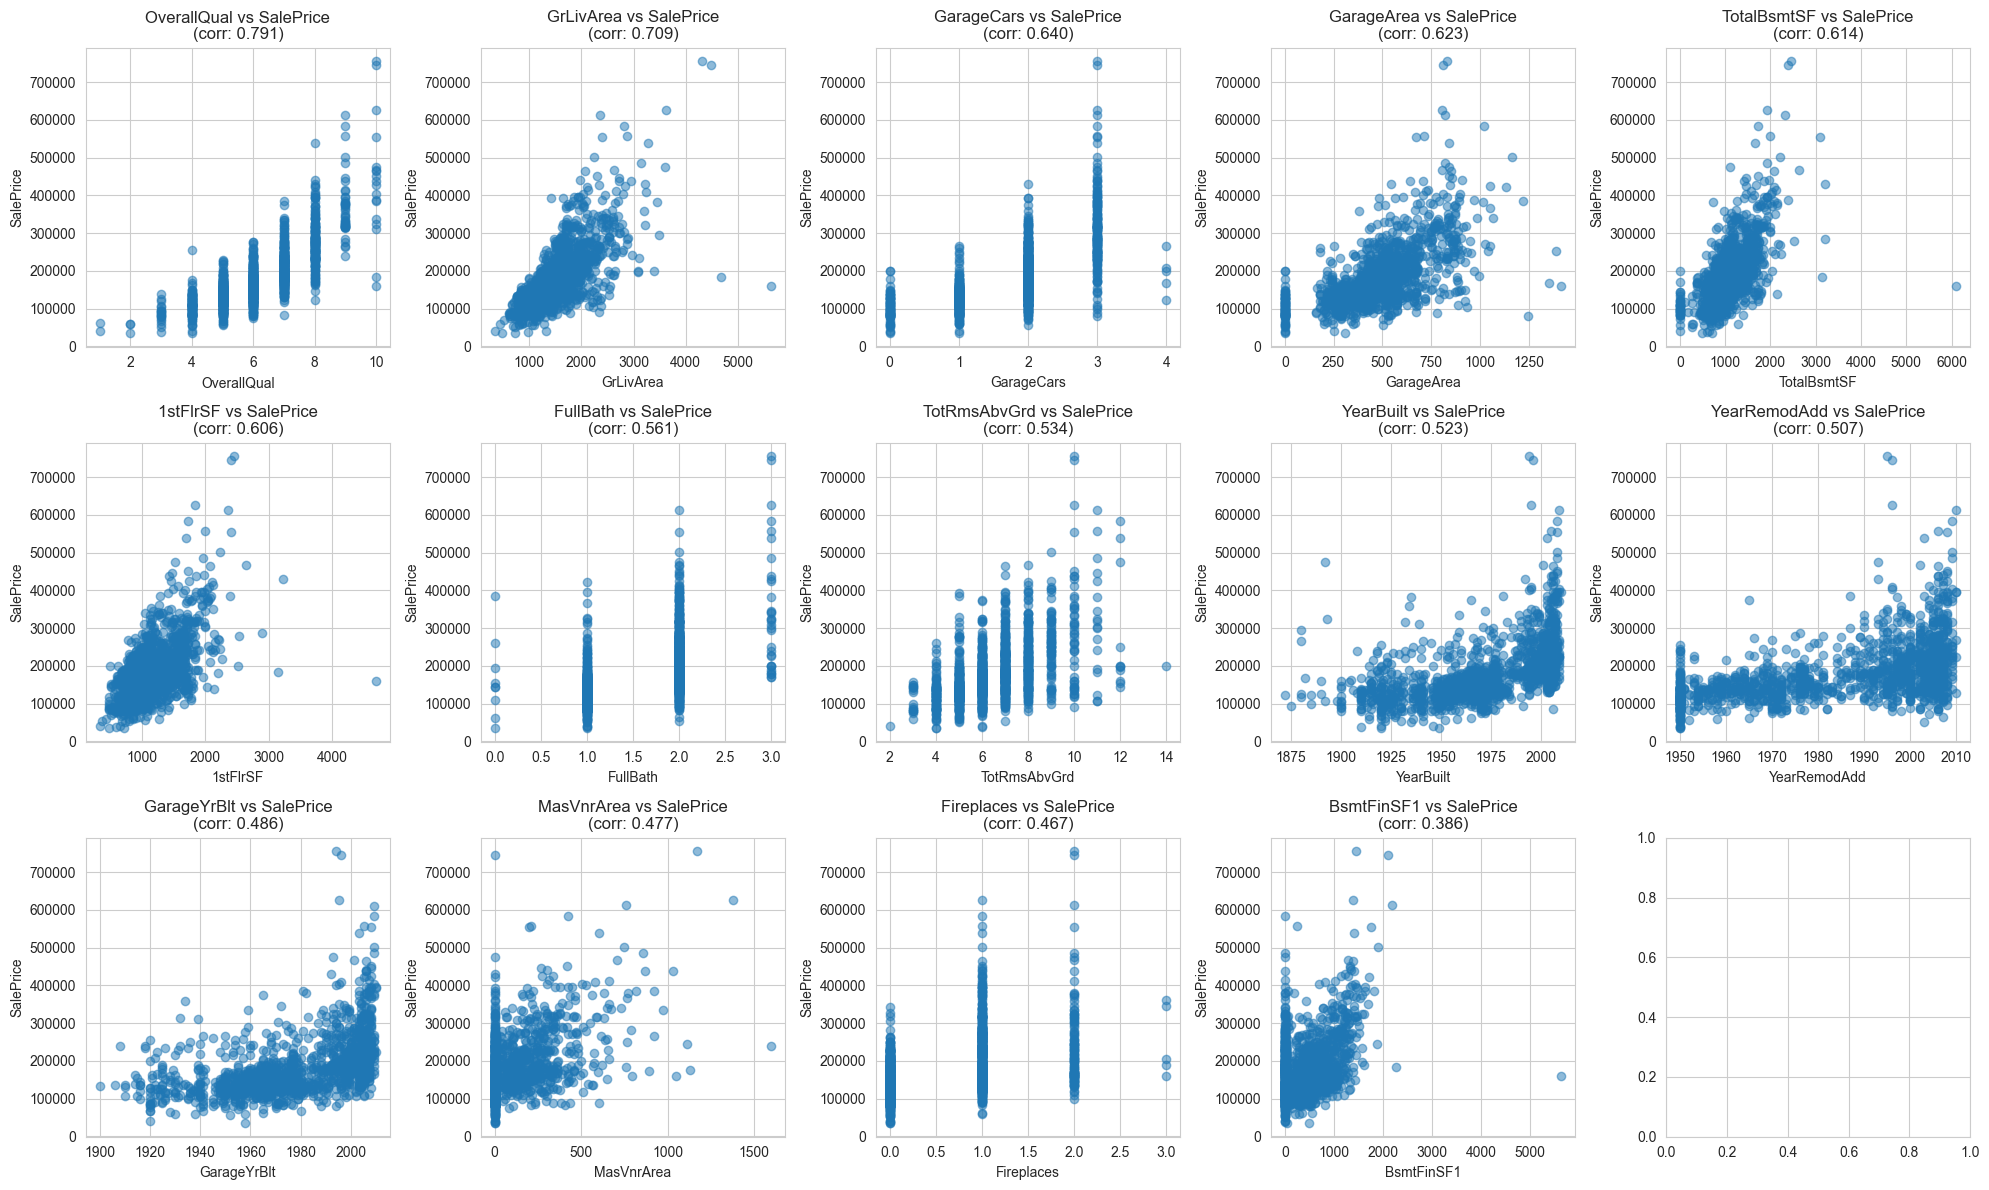

In [5]:
top_corr = correlations.head(15).index.tolist()
top_corr.remove('SalePrice')

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(top_corr):
    axes[i].scatter(train[col], train['SalePrice'], alpha=0.5)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{col} vs SalePrice\n(corr: {correlations[col]:.3f})')

plt.tight_layout()
plt.show()


In [6]:
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

missing_df = pd.DataFrame({
    'Train_Missing': missing_train,
    'Test_Missing': missing_test,
    'Train_Percent': (missing_train / len(train)) * 100,
    'Test_Percent': (missing_test / len(test)) * 100
})

missing_df = missing_df[(missing_df['Train_Missing'] > 0) | (missing_df['Test_Missing'] > 0)].sort_values('Train_Missing', ascending=False)
print("Missing values analysis:")
print(missing_df.head(20))


Missing values analysis:
              Train_Missing  Test_Missing  Train_Percent  Test_Percent
PoolQC                 1453        1456.0      99.520548     99.794380
MiscFeature            1406        1408.0      96.301370     96.504455
Alley                  1369        1352.0      93.767123     92.666210
Fence                  1179        1169.0      80.753425     80.123372
MasVnrType              872         894.0      59.726027     61.274846
FireplaceQu             690         730.0      47.260274     50.034270
LotFrontage             259         227.0      17.739726     15.558602
GarageFinish             81          78.0       5.547945      5.346127
GarageCond               81          78.0       5.547945      5.346127
GarageYrBlt              81          78.0       5.547945      5.346127
GarageType               81          76.0       5.547945      5.209047
GarageQual               81          78.0       5.547945      5.346127
BsmtFinType2             38          42.0       2.60

Outliers (GrLivArea > 4000, SalePrice < 300k): 2
        Id  GrLivArea  SalePrice  OverallQual Neighborhood
523    524       4676     184750           10      Edwards
1298  1299       5642     160000           10      Edwards


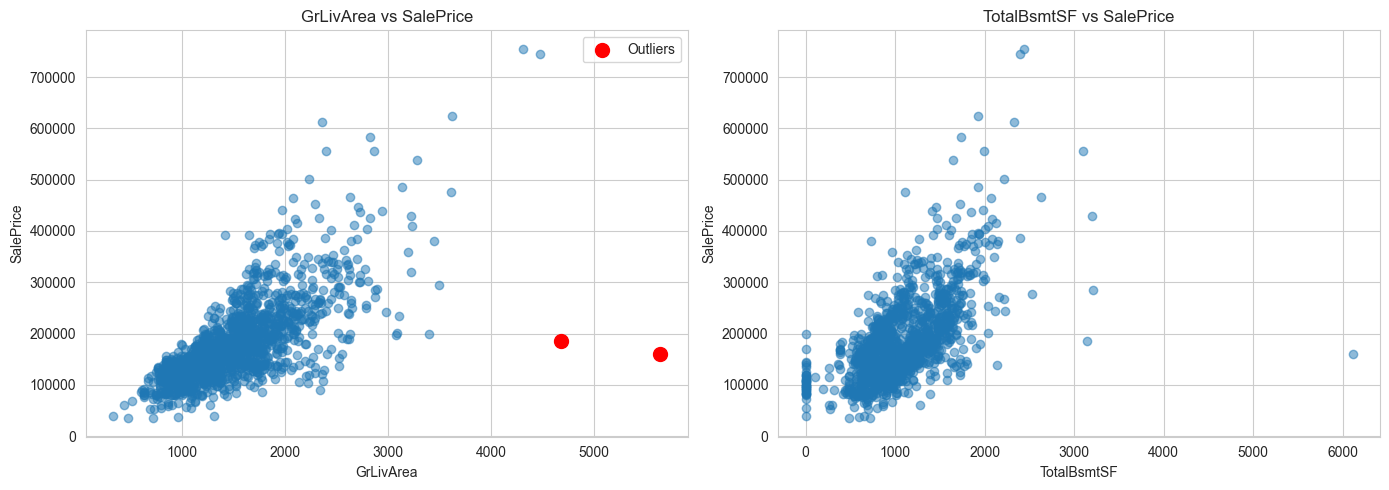

In [7]:
outliers = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)]
print(f"Outliers (GrLivArea > 4000, SalePrice < 300k): {len(outliers)}")
print(outliers[['Id', 'GrLivArea', 'SalePrice', 'OverallQual', 'Neighborhood']])

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(train['GrLivArea'], train['SalePrice'], alpha=0.5)
axes[0].scatter(outliers['GrLivArea'], outliers['SalePrice'], color='red', s=100, label='Outliers')
axes[0].set_xlabel('GrLivArea')
axes[0].set_ylabel('SalePrice')
axes[0].set_title('GrLivArea vs SalePrice')
axes[0].legend()

axes[1].scatter(train['TotalBsmtSF'], train['SalePrice'], alpha=0.5)
axes[1].set_xlabel('TotalBsmtSF')
axes[1].set_ylabel('SalePrice')
axes[1].set_title('TotalBsmtSF vs SalePrice')

plt.tight_layout()
plt.show()


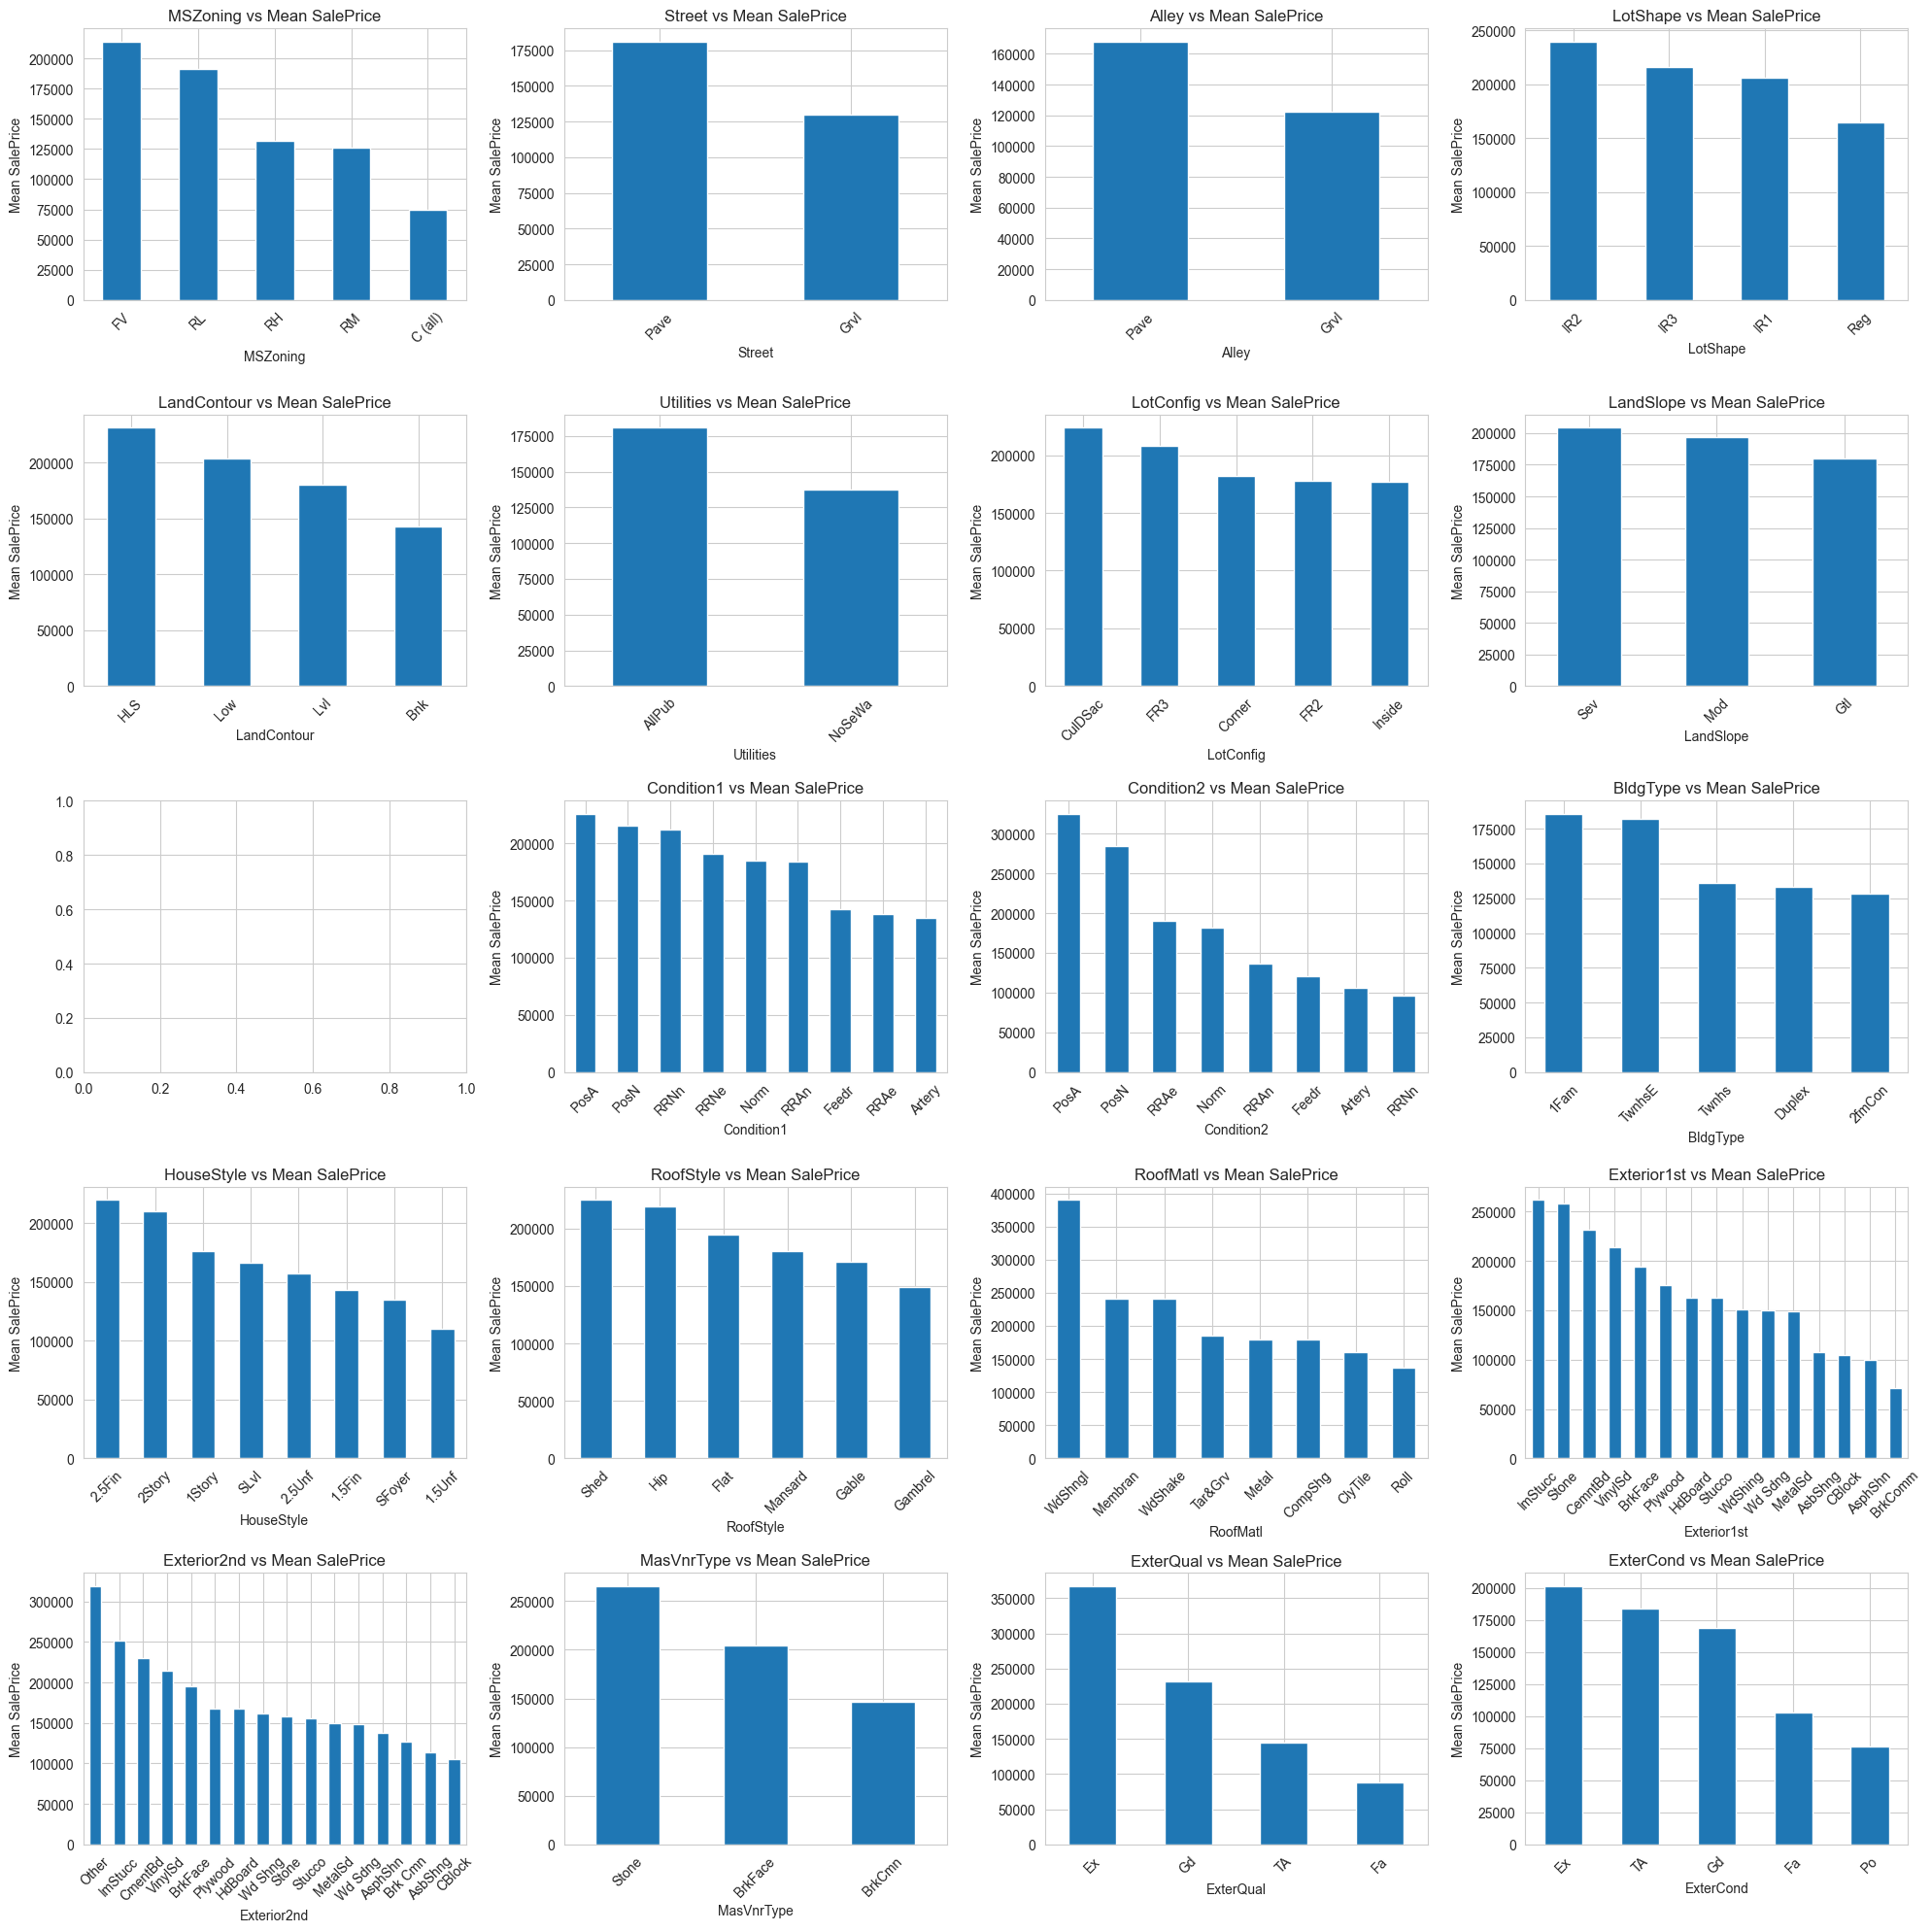

In [8]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_cols[:20]):
    if train[col].nunique() <= 20:
        train.groupby(col)['SalePrice'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Mean SalePrice')
        axes[i].set_ylabel('Mean SalePrice')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Neighborhood statistics:
                       mean            std  count
Neighborhood                                     
NoRidge       335295.317073  121412.658640     41
NridgHt       316270.623377   96392.544954     77
StoneBr       310499.000000  112969.676640     25
Timber        242247.447368   64845.651549     38
Veenker       238772.727273   72369.317959     11
Somerst       225379.837209   56177.555888     86
ClearCr       212565.428571   50231.538993     28
Crawfor       210624.725490   68866.395472     51
CollgCr       197965.773333   51403.666438    150
Blmngtn       194870.882353   30393.229219     17
Gilbert       192854.506329   35986.779085     79
NWAmes        189050.068493   37172.218106     73
SawyerW       186555.796610   55651.997820     59
Mitchel       156270.122449   36486.625334     49
NAmes         145847.080000   33075.345450    225
NPkVill       142694.444444    9377.314529      9
SWISU         142591.360000   32622.917679     25
Blueste       137500.0000

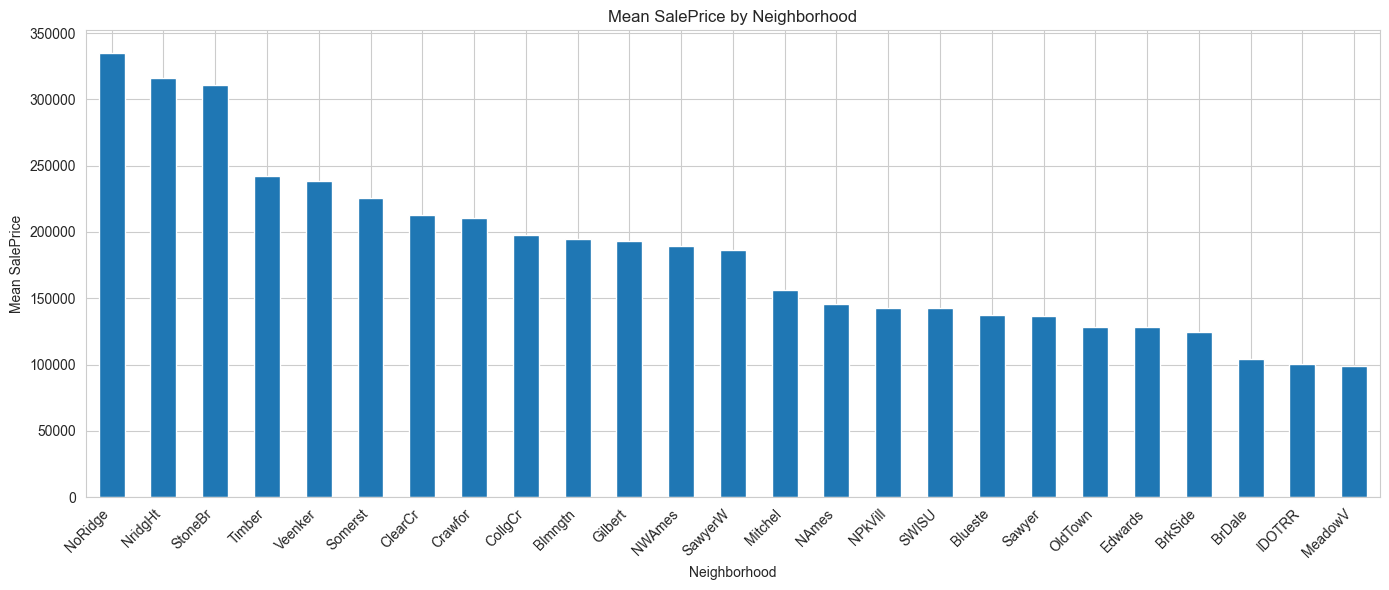

In [9]:
if 'Neighborhood' in train.columns:
    neighborhood_stats = train.groupby('Neighborhood')['SalePrice'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
    print("Neighborhood statistics:")
    print(neighborhood_stats)
    
    plt.figure(figsize=(14, 6))
    neighborhood_stats['mean'].plot(kind='bar')
    plt.title('Mean SalePrice by Neighborhood')
    plt.ylabel('Mean SalePrice')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


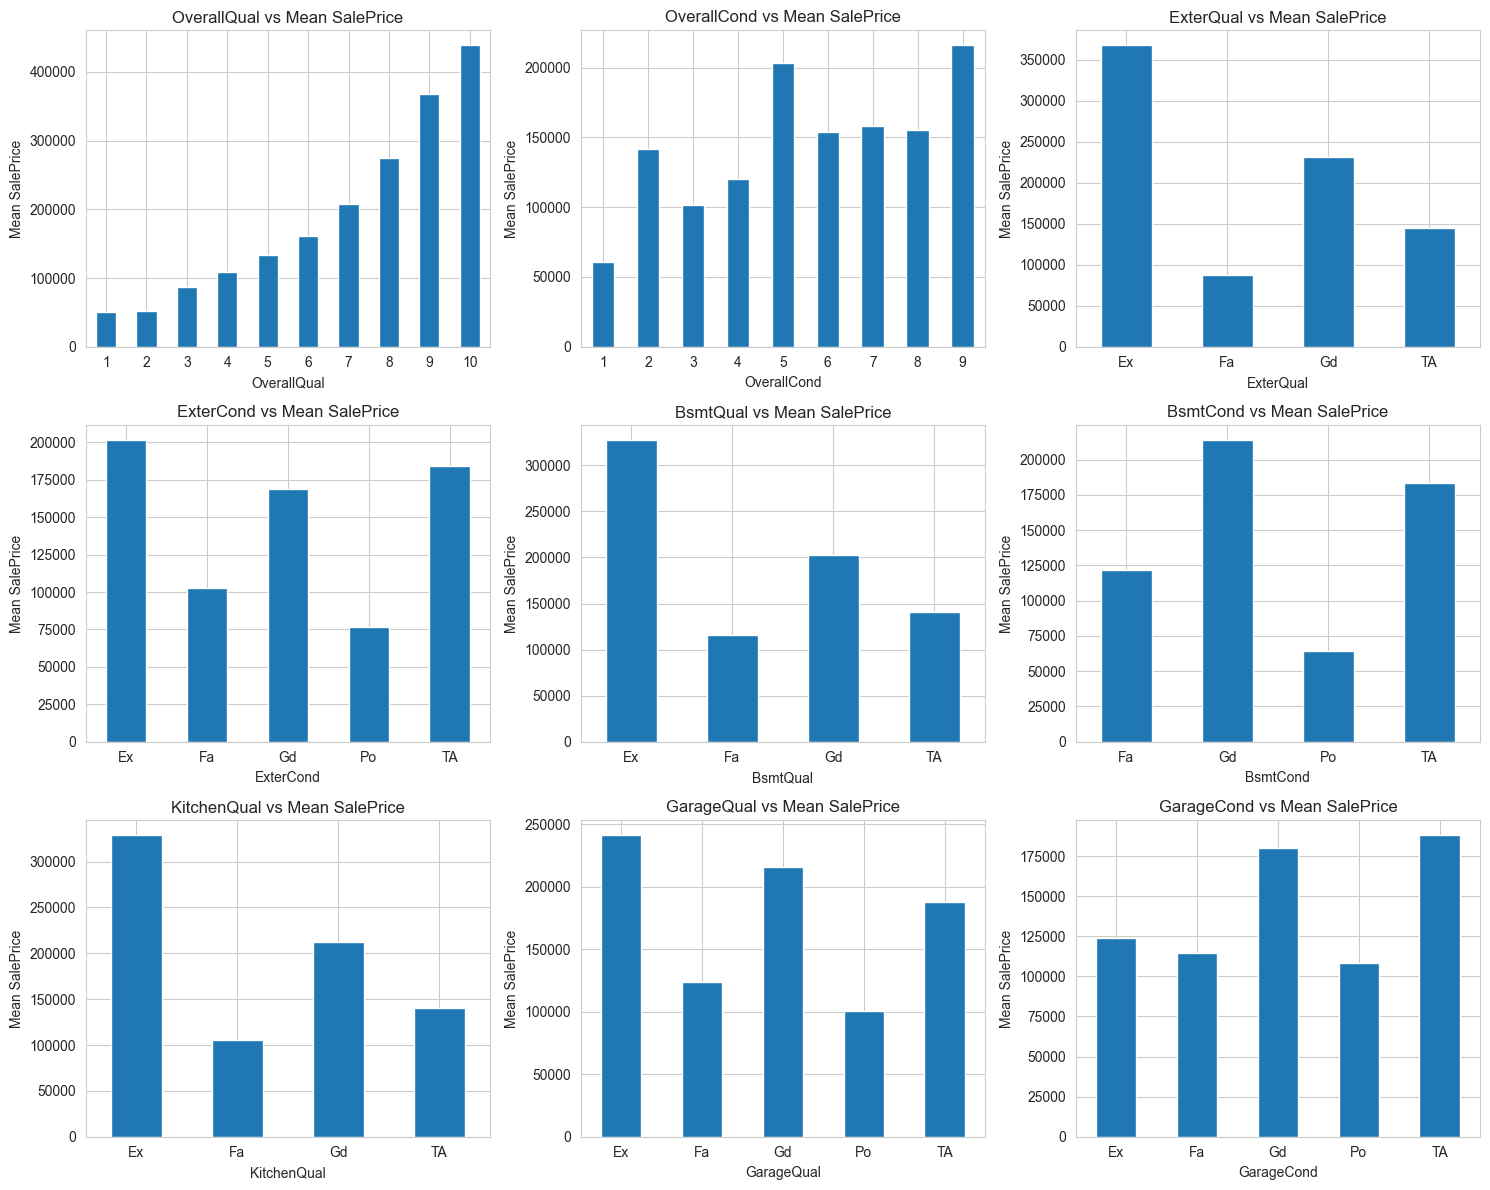

In [10]:
quality_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 
                'BsmtQual', 'BsmtCond', 'KitchenQual', 'GarageQual', 'GarageCond']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(quality_cols):
    if col in train.columns:
        train.groupby(col)['SalePrice'].mean().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Mean SalePrice')
        axes[i].set_ylabel('Mean SalePrice')
        axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


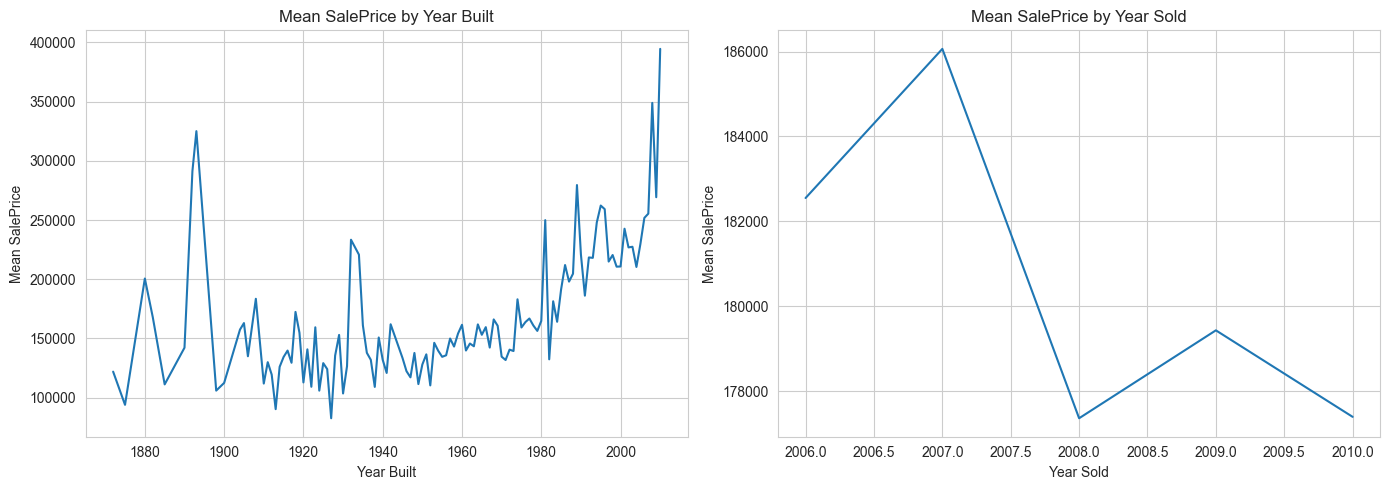

In [11]:
train['YearBuilt'].describe()
train['YrSold'].describe()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

train.groupby('YearBuilt')['SalePrice'].mean().plot(ax=axes[0])
axes[0].set_title('Mean SalePrice by Year Built')
axes[0].set_xlabel('Year Built')
axes[0].set_ylabel('Mean SalePrice')

train.groupby('YrSold')['SalePrice'].mean().plot(ax=axes[1])
axes[1].set_title('Mean SalePrice by Year Sold')
axes[1].set_xlabel('Year Sold')
axes[1].set_ylabel('Mean SalePrice')

plt.tight_layout()
plt.show()


Top 30 Most Important Features:
         feature  importance
16   OverallQual    0.545891
45     GrLivArea    0.115161
37   TotalBsmtSF    0.046481
60    GarageCars    0.041121
61    GarageArea    0.023236
42      1stFlrSF    0.022186
33    BsmtFinSF1    0.020947
18     YearBuilt    0.016370
40    CentralAir    0.014283
17   OverallCond    0.012932
3        LotArea    0.012275
57    GarageType    0.009748
19  YearRemodAdd    0.008907
1       MSZoning    0.008552
2    LotFrontage    0.006378
43      2ndFlrSF    0.005868
11  Neighborhood    0.005622
36     BsmtUnfSF    0.005408
55    Fireplaces    0.004723
66   OpenPorchSF    0.003997
29      BsmtQual    0.003777
58   GarageYrBlt    0.003748
65    WoodDeckSF    0.003177
75        MoSold    0.003003
53  TotRmsAbvGrd    0.002724
25    MasVnrArea    0.002639
32  BsmtFinType1    0.002578
27     ExterCond    0.002386
59  GarageFinish    0.002328
0     MSSubClass    0.002319


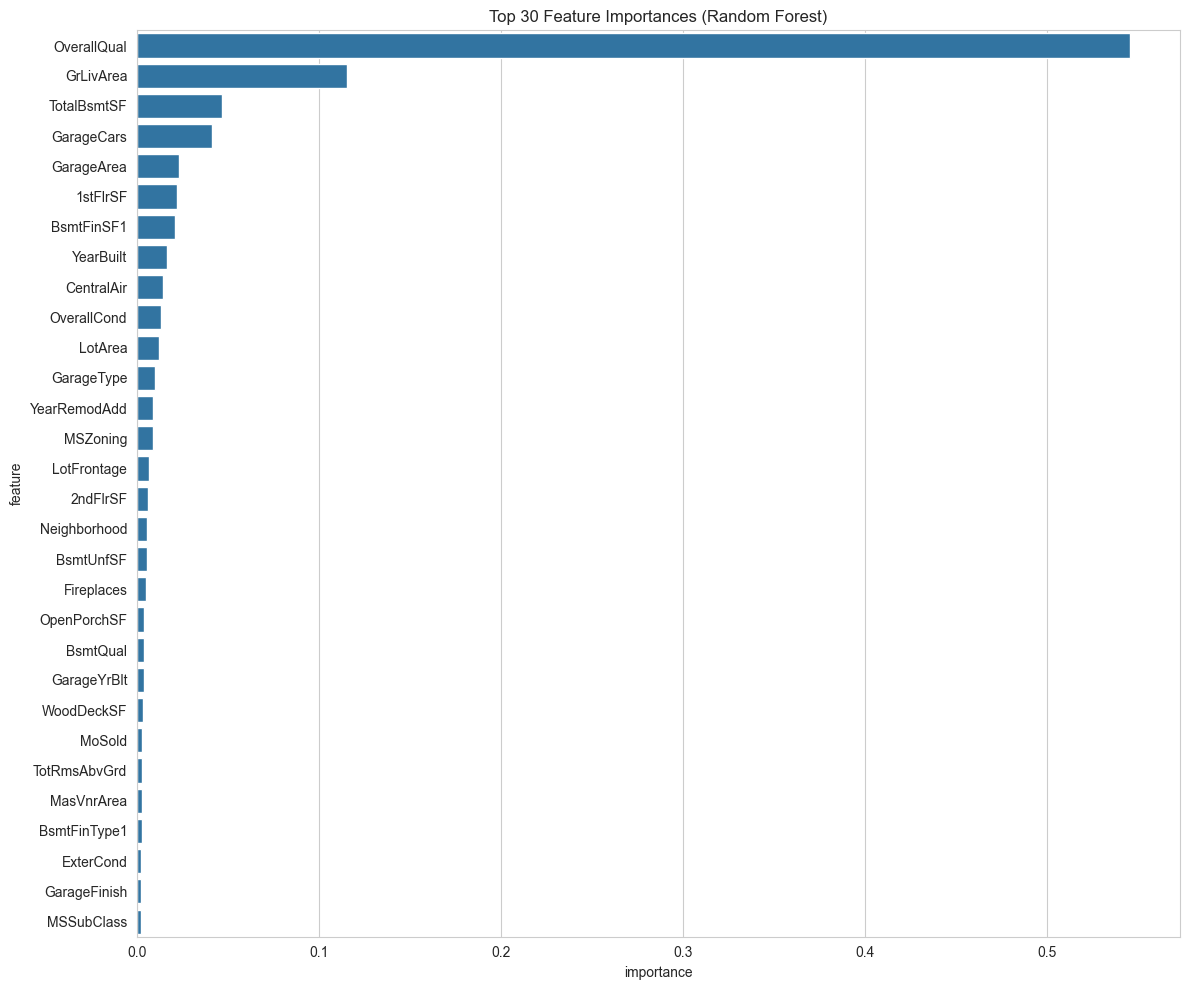

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import os

train_temp = train.copy()
train_temp['SalePrice'] = np.log1p(train_temp['SalePrice'])

none_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
             'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for col in none_cols:
    if col in train_temp.columns:
        train_temp[col].fillna('None', inplace=True)

for col in train_temp.select_dtypes(include=[np.number]).columns:
    if train_temp[col].isnull().sum() > 0:
        train_temp[col].fillna(train_temp[col].median(), inplace=True)

for col in train_temp.select_dtypes(include=['object']).columns:
    if train_temp[col].isnull().sum() > 0:
        train_temp[col].fillna(train_temp[col].mode()[0], inplace=True)

from sklearn.preprocessing import LabelEncoder
le_dict = {}
for col in train_temp.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_temp[col] = le.fit_transform(train_temp[col].astype(str))
    le_dict[col] = le

X = train_temp.drop(['Id', 'SalePrice'], axis=1)
y = train_temp['SalePrice']

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 30 Most Important Features:")
print(feature_importance.head(30))

plt.figure(figsize=(12, 10))
sns.barplot(data=feature_importance.head(30), x='importance', y='feature')
plt.title('Top 30 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [13]:
print("\nFeatures with very low importance (< 0.001):")
low_importance = feature_importance[feature_importance['importance'] < 0.001]
print(f"Count: {len(low_importance)}")
print(low_importance)

print("\nFeatures with zero variance or constant values:")
constant_features = []
for col in X.columns:
    if X[col].nunique() <= 1:
        constant_features.append(col)
print(f"Constant features: {constant_features}")



Features with very low importance (< 0.001):
Count: 30
         feature  importance
56   FireplaceQu    0.000967
72         Fence    0.000909
15    HouseStyle    0.000902
62    GarageQual    0.000873
9      LotConfig    0.000829
41    Electrical    0.000746
28    Foundation    0.000731
12    Condition1    0.000701
10     LandSlope    0.000700
20     RoofStyle    0.000644
77      SaleType    0.000591
30      BsmtCond    0.000577
69   ScreenPorch    0.000480
14      BldgType    0.000469
34  BsmtFinType2    0.000438
35    BsmtFinSF2    0.000432
5          Alley    0.000418
24    MasVnrType    0.000257
21      RoofMatl    0.000213
47  BsmtHalfBath    0.000213
74       MiscVal    0.000199
13    Condition2    0.000143
38       Heating    0.000100
44  LowQualFinSF    0.000086
68     3SsnPorch    0.000071
73   MiscFeature    0.000067
71        PoolQC    0.000048
4         Street    0.000034
70      PoolArea    0.000033
8      Utilities    0.000000

Features with zero variance or constant valu

In [14]:
train['MSSubClass'] = train['MSSubClass'].astype(str)

print("MSSubClass distribution:")
print(train['MSSubClass'].value_counts().sort_index())
print("\nMean SalePrice by MSSubClass:")
print(train.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=False))


MSSubClass distribution:
MSSubClass
120     87
160     63
180     10
190     30
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
Name: count, dtype: int64

Mean SalePrice by MSSubClass:
MSSubClass
60     239948.501672
120    200779.080460
75     192437.500000
20     185224.811567
80     169736.551724
70     166772.416667
40     156125.000000
85     147810.000000
50     143302.972222
160    138647.380952
90     133541.076923
190    129613.333333
45     108591.666667
180    102300.000000
30      95829.724638
Name: SalePrice, dtype: float64


In [15]:
print("SaleType distribution:")
print(train['SaleType'].value_counts())
print("\nMean SalePrice by SaleType:")
print(train.groupby('SaleType')['SalePrice'].mean().sort_values(ascending=False))

print("\n\nSaleCondition distribution:")
print(train['SaleCondition'].value_counts())
print("\nMean SalePrice by SaleCondition:")
print(train.groupby('SaleCondition')['SalePrice'].mean().sort_values(ascending=False))


SaleType distribution:
SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

Mean SalePrice by SaleType:
SaleType
New      274945.418033
Con      269600.000000
CWD      210600.000000
ConLI    200390.000000
WD       173401.836622
COD      143973.255814
ConLw    143700.000000
ConLD    138780.888889
Oth      119850.000000
Name: SalePrice, dtype: float64


SaleCondition distribution:
SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

Mean SalePrice by SaleCondition:
SaleCondition
Partial    272291.752000
Normal     175202.219533
Alloca     167377.416667
Family     149600.000000
Abnorml    146526.623762
AdjLand    104125.000000
Name: SalePrice, dtype: float64


In [16]:
skewed_features = []
for col in numeric_cols:
    if train[col].skew() > 0.75 or train[col].skew() < -0.75:
        skewed_features.append((col, train[col].skew()))

skewed_features.sort(key=lambda x: abs(x[1]), reverse=True)
print("Highly skewed features (|skew| > 0.75):")
for col, skew_val in skewed_features[:15]:
    print(f"{col:20s} {skew_val:8.3f}")


Highly skewed features (|skew| > 0.75):
MiscVal                24.477
PoolArea               14.828
LotArea                12.208
3SsnPorch              10.304
LowQualFinSF            9.011
KitchenAbvGr            4.488
BsmtFinSF2              4.255
ScreenPorch             4.122
BsmtHalfBath            4.103
EnclosedPorch           3.090
MasVnrArea              2.669
OpenPorchSF             2.364
LotFrontage             2.164
BsmtFinSF1              1.686
WoodDeckSF              1.541
